# Problems and Targets

Zakk Yang

## Variable Description

<br>1 - age (numeric)<br>
<br>2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
<br>3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
<br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
<br>7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
<br>8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
<br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
<br>10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
<br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
<br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
<br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
<br>14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
<br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
<br>17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
<br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br> 
<br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
<br><br>20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

<br>Output variable (desired target):<br>
<br>21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

## Project Purpose

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Importing Packages

In [106]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import datetime
import matplotlib
%matplotlib inline


from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
jtplot.style(context='talk', fscale=1.5, spines=False, gridlines='')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'w'
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

#import plotly offline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

## Import Data 

In [107]:
data = pd.read_csv('bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


In [108]:
data['y'].value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

In [109]:
#change the target to numerical
data['target']=data['y'].apply(lambda x: 1 if x=='yes' else 0)
#another way: data['y'].replace(to_replace=['yes','no'], value=[1,0],inplace=True)
data.drop(columns='y',axis=1,inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0


## Rename Columns

In [110]:
col = {'contact':'contact_method', 'default':'credit_default', 'housing':'housing_loan', 'loan':'personal_loan',
       'month': 'contact_month', 'campaign':'campaign_contact_num','previous': 'contact_num_before',
       'poutcome':'campaign_outcome_before','emp.var.rate': 'emp_quarter'}
data.rename(columns=col, inplace=True)

In [111]:
data.head()

,age,job,marital,education,credit_default,housing_loan,personal_loan,contact_method,contact_month,day_of_week,duration,campaign_contact_num,pdays,contact_num_before,campaign_outcome_before,emp_quarter,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,0


## Removing Duplicated Values

In [112]:
data = data.drop_duplicates()

In [113]:
data.shape

(41176, 21)

# Data Summary

In [114]:
def overview(data):
    print ('Data Summary:')
    print('\n')
    print('Rows * Columns: {}'.format(data.shape))
    print('\n')
    pd.set_option('display.width', 100)
    pd.set_option('precision', 2)
    print ('Statistical Summary:')
    print(data.describe())
    print('\n')
    print ('Classification Target', data.groupby('target').size())
    print('\n')
    print('Column Types:') 
    print(data.dtypes)
    print('\n')
    print('Quick Correlation:')
    print(data.corr(method='pearson'))
    print('\n')
    print ('Skewness: Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.\
    Many machine learning algorithms assume a Gaussian distribution.\
    Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.\
    The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.')
    print(data.skew().sort_values(ascending=False))

In [115]:
overview(data)

Data Summary:


Rows * Columns: (41176, 21)


Statistical Summary:
            age  duration  campaign_contact_num     pdays  contact_num_before  emp_quarter  \
count  41176.00  41176.00              41176.00  41176.00            41176.00     41176.00   
mean      40.02    258.32                  2.57    962.46                0.17         0.08   
std       10.42    259.31                  2.77    186.94                0.49         1.57   
min       17.00      0.00                  1.00      0.00                0.00        -3.40   
25%       32.00    102.00                  1.00    999.00                0.00        -1.80   
50%       38.00    180.00                  2.00    999.00                0.00         1.10   
75%       47.00    319.00                  3.00    999.00                0.00         1.40   
max       98.00   4918.00                 56.00    999.00                7.00         1.40   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed    target  
count        

# Column Types

## Data Types Correction

##### The column type in this data is correct.

## Quick Missing Value Overview

In [116]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [117]:
missing_values_table(data)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


##### By far, there seems no missing values, but it is not ture, we need to look into the value in every column, particularly in categorical columns

In [118]:
for col in list(data.columns):
    unique=data[col].unique()
    if data[col].dtypes == 'object':
        print("Feature '{col}' has {unique} ".format(col=col, unique=unique))

Feature 'job' has ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 
Feature 'marital' has ['married' 'single' 'divorced' 'unknown'] 
Feature 'education' has ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 
Feature 'credit_default' has ['no' 'unknown' 'yes'] 
Feature 'housing_loan' has ['no' 'yes' 'unknown'] 
Feature 'personal_loan' has ['no' 'yes' 'unknown'] 
Feature 'contact_method' has ['telephone' 'cellular'] 
Feature 'contact_month' has ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 
Feature 'day_of_week' has ['mon' 'tue' 'wed' 'thu' 'fri'] 
Feature 'campaign_outcome_before' has ['nonexistent' 'failure' 'success'] 


##### unknown is the same as NaN, so need to replace it 

In [119]:
#replace the 'unknown' value to NaN
data = data.replace(to_replace='unknown', value = np.nan)

In [120]:
missing_values_table(data)

Your selected dataframe has 21 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
credit_default,8596,20.9
education,1730,4.2
housing_loan,990,2.4
personal_loan,990,2.4
job,330,0.8
marital,80,0.2


##### It is clear now that 6 columns are with Nan but missing values in all these columns are lower than 60%. It is better to impute the missing values rather than delete them. 

# Quick Exploratory Data Analysis¶

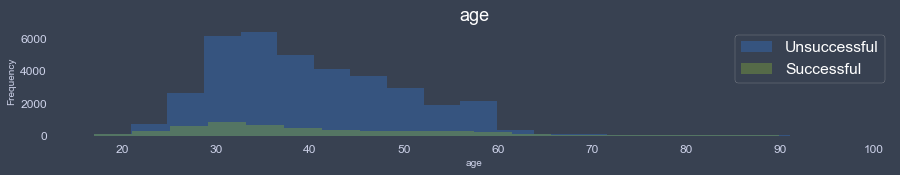

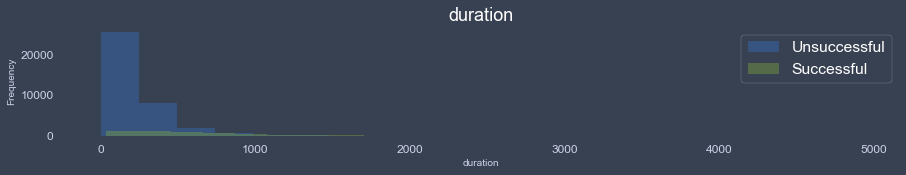

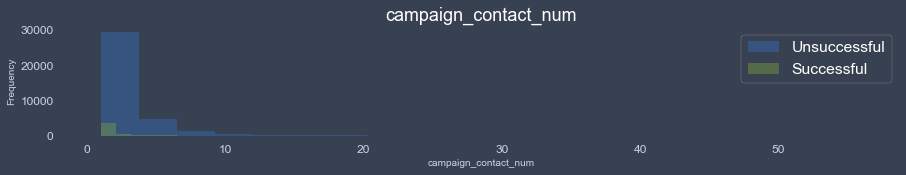

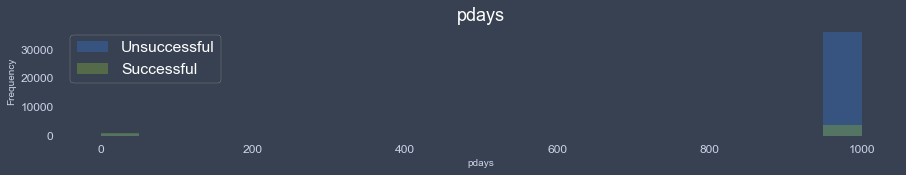

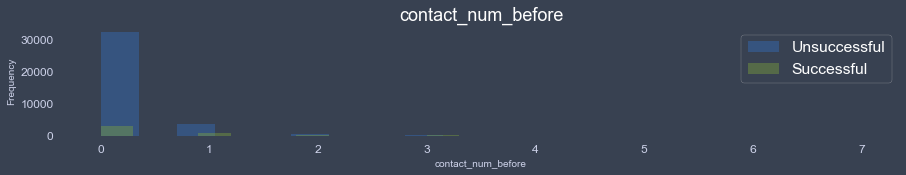

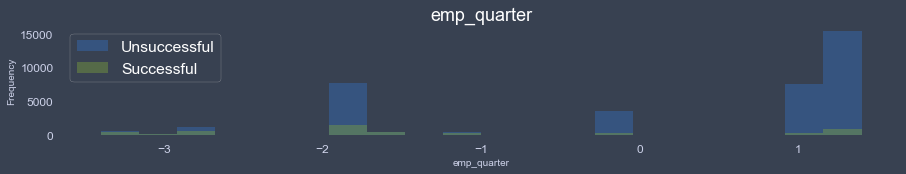

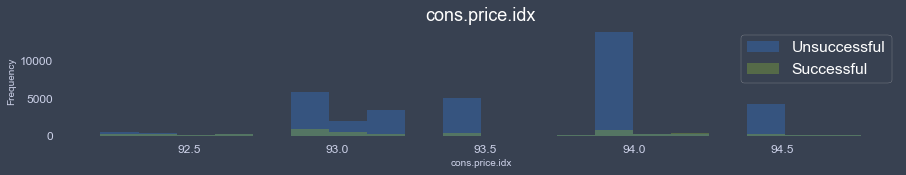

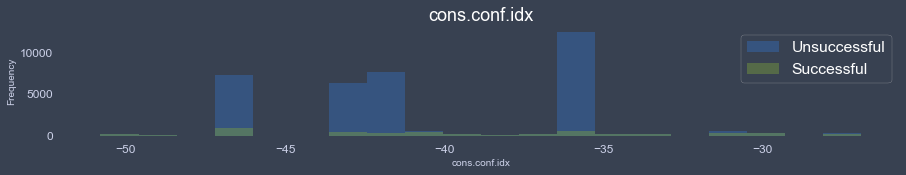

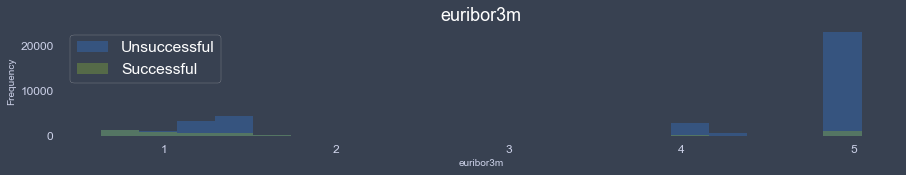

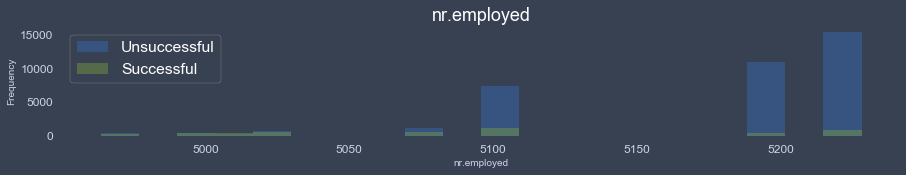

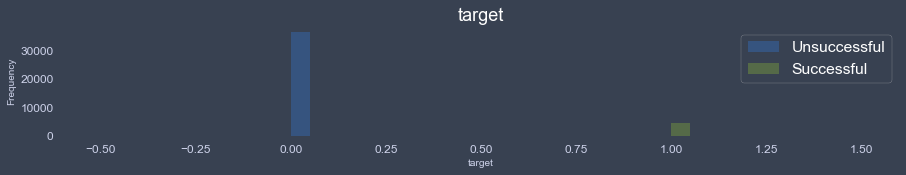

In [121]:
for col in list(data.select_dtypes('number').columns):
    plt.figure(figsize=(15,2))
    data[data['target'] == 0][col].hist(label='Unsuccessful', bins=20, alpha=0.4)
    data[data['target'] == 1][col].hist(label='Successful', bins=20, alpha=0.4)
    plt.xlabel(col, size=10), plt.ylabel('Frequency', size=10), plt.title(col)
    plt.legend(loc=0)

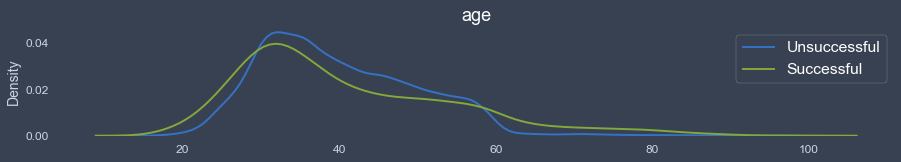

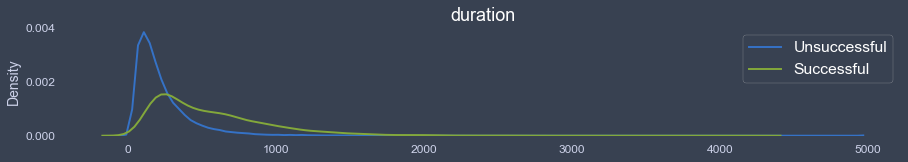

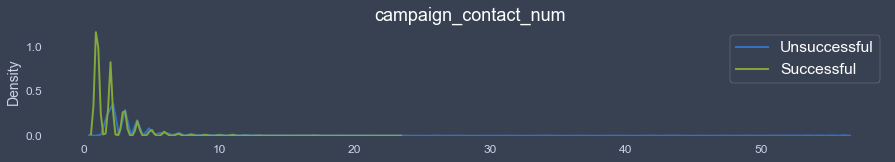

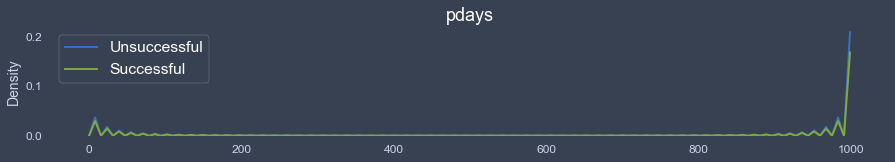

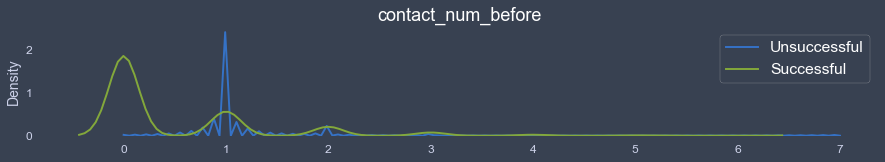

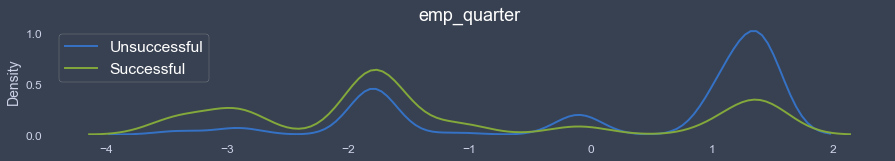

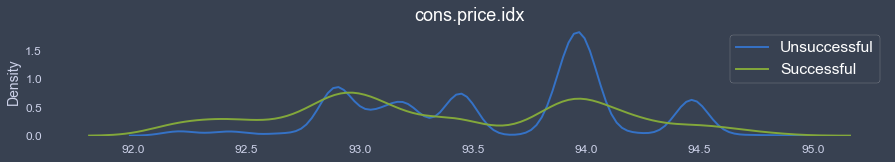

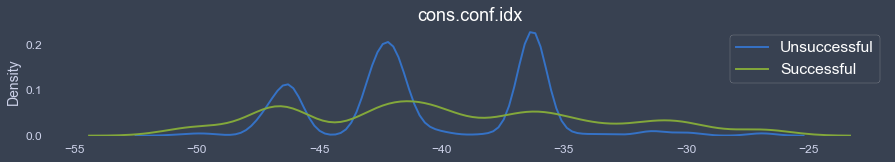

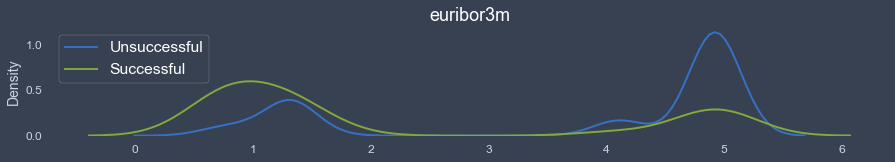

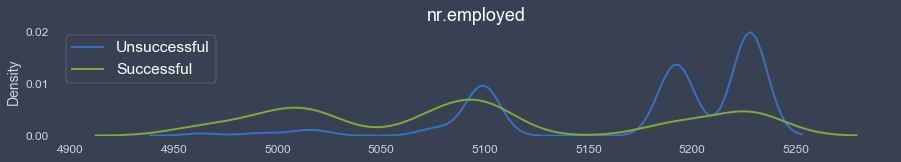

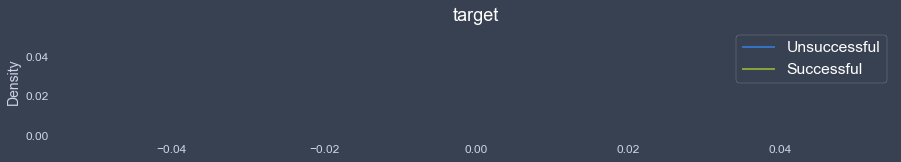

In [122]:
#density chart of numeric columns to look into the distribution of the target
for col in list(data.select_dtypes('number').columns):
    plt.figure(figsize=(15,2))
    sns.kdeplot(data[data['target'] == 0][col], label='Unsuccessful')
    sns.kdeplot(data[data['target'] == 1][col], label='Successful')
    plt.ylabel('Density'), plt.title(col)

age: the age distribution of both marketing results are similar
duration: as described in the beginning, the duration is the result of the campaign; it makes sense that the longer the duration ,the more possible the result is positive

campaign_contact_num: not surprisingly, most succesful results are made within very few times

pdays: both positive and negative results are highly correlated, it is considered to be deleted

contact_num_before: most successful customers are new customers who are never approached

euribor3m: euribor3m means the euribor Euribor was created in 1999 and is an acronym for “EURO InterBank Offered Rate”.It indicates the 3-month average rate of interest at which a large number of European banks offer to lend each other short-term funds to lend money to individuals and companies. Therefore, the lower the euribor3m is the more possibility the campaign result is positive because the lending rate is lower than the interest

emp_quarter: the quarter variation of employment. The positive result is supposed to be negatively correlated with this indicator. However, this pattern is confusing: peak of positive marketing result in -2%

cons.conf.idx and cons.price.idx: consumer confidence and consumer price has seen no particular influence on the result. The higher the consumer confidence, the higher the positive marketing result should be. However, this is not the case in this project. This is possibly because of the contact date is not evenly distributed.



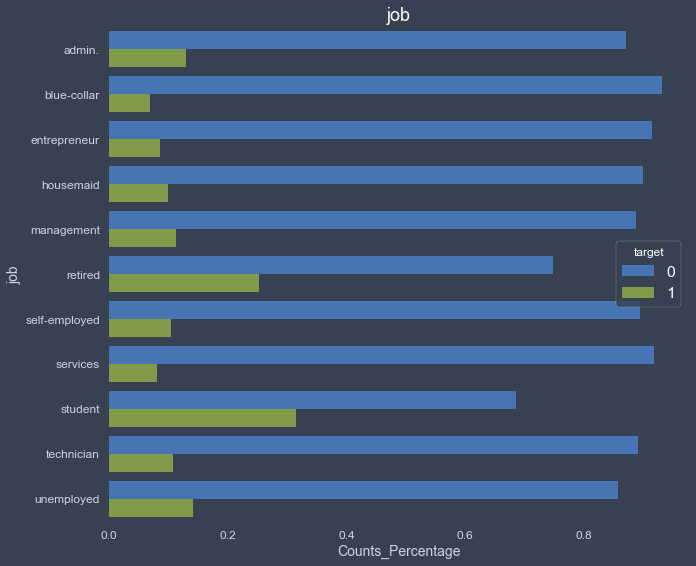

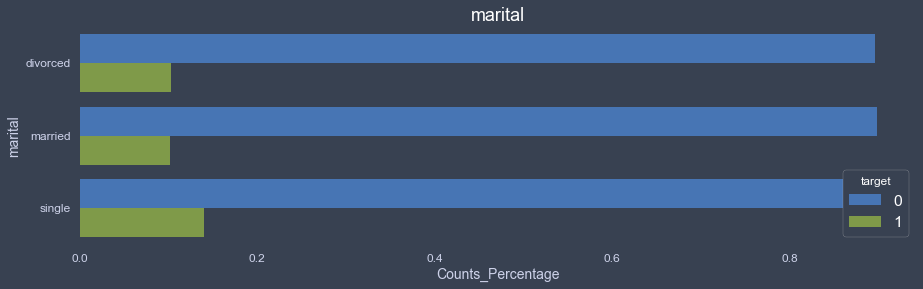

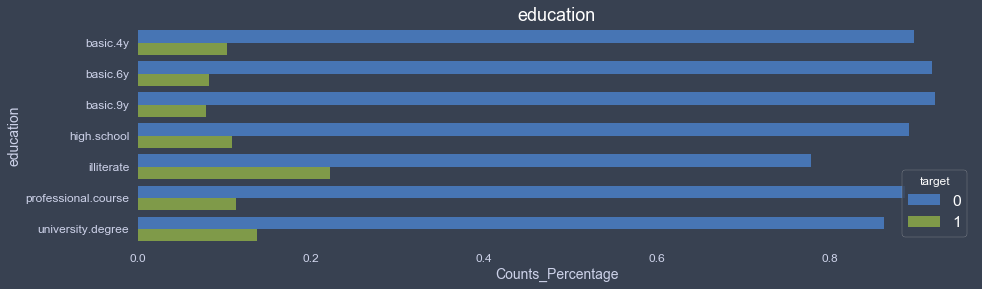

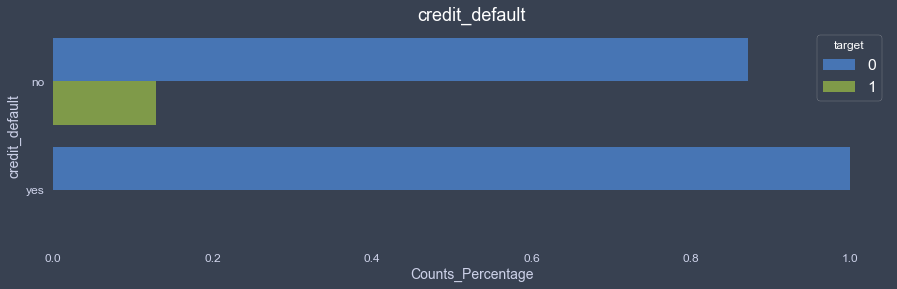

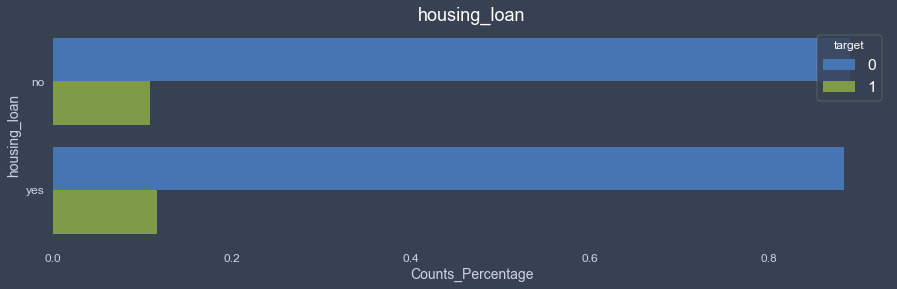

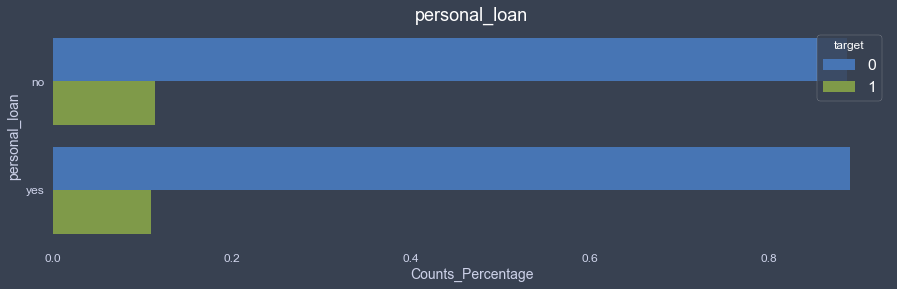

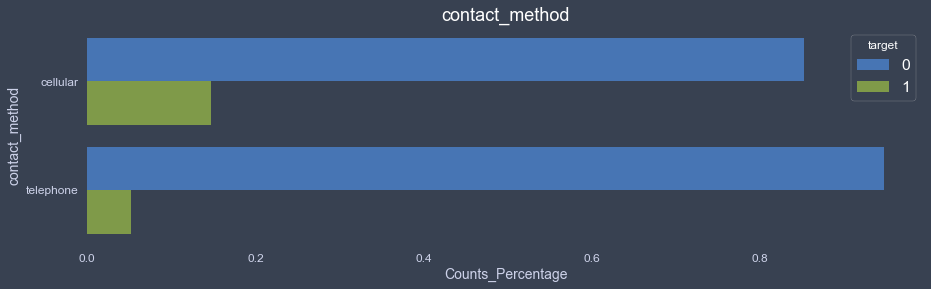

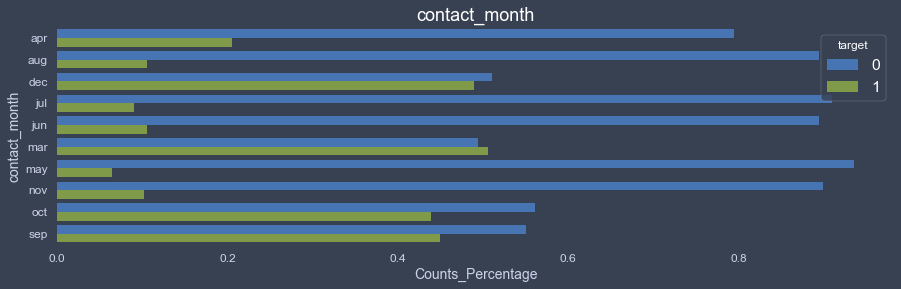

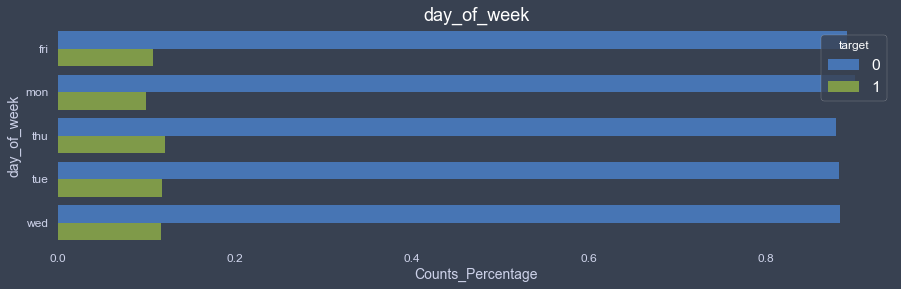

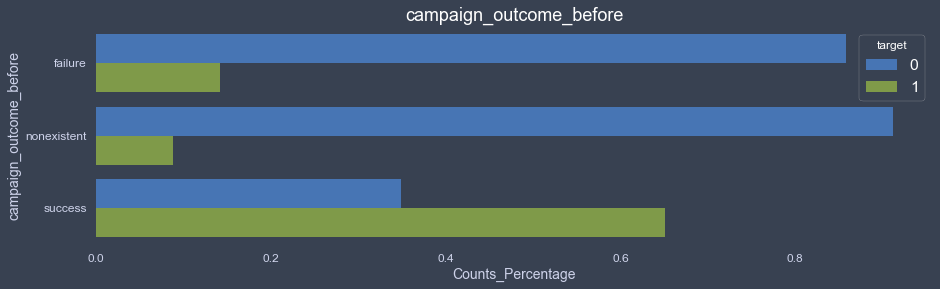

<Figure size 1080x288 with 0 Axes>

In [123]:
#quick review on numeric columns by bar charts (%)
for col in list(data.select_dtypes(exclude='number').columns):
    plt.title(col)
    g=data.groupby([col,'target']).size().reset_index(name='Counts')
    a=g.groupby(col)['Counts'].transform('sum')
    g['Counts_Percentage'] = g['Counts'].div(a)
    sns.barplot(data=g, y=col, x='Counts_Percentage', hue='target',orient='h')
    plt.figure(figsize=(15,4))
  

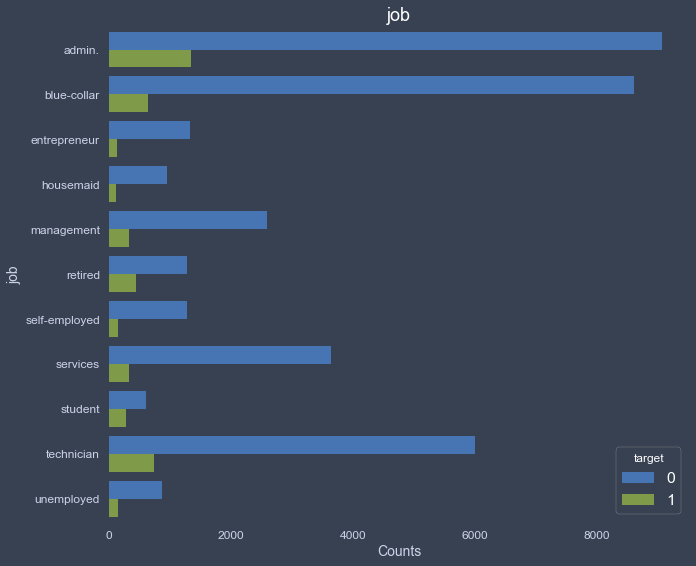

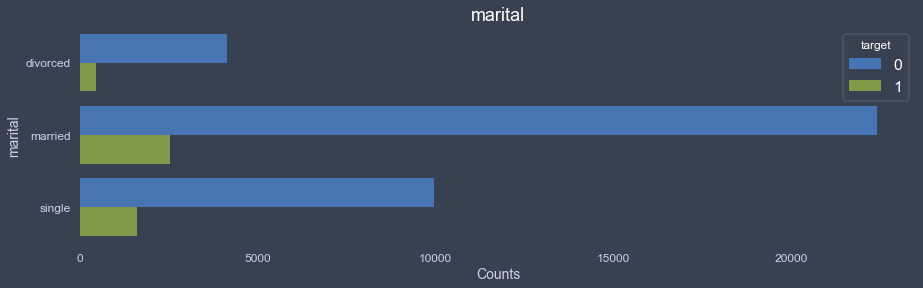

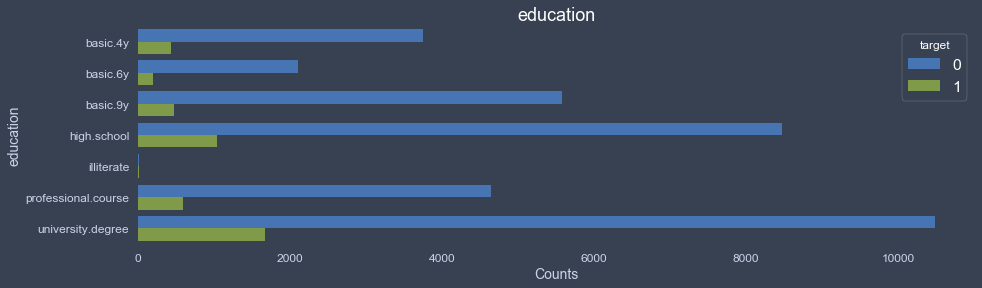

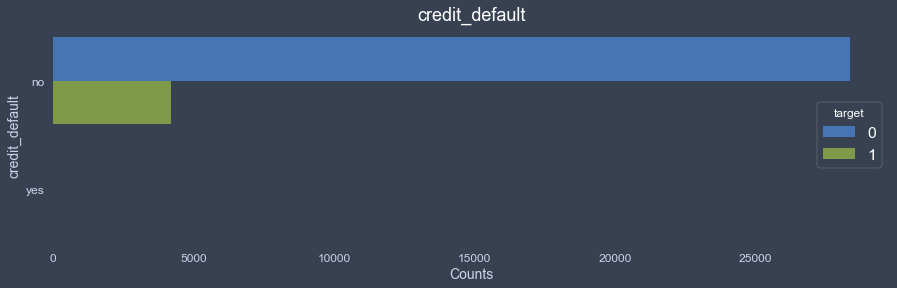

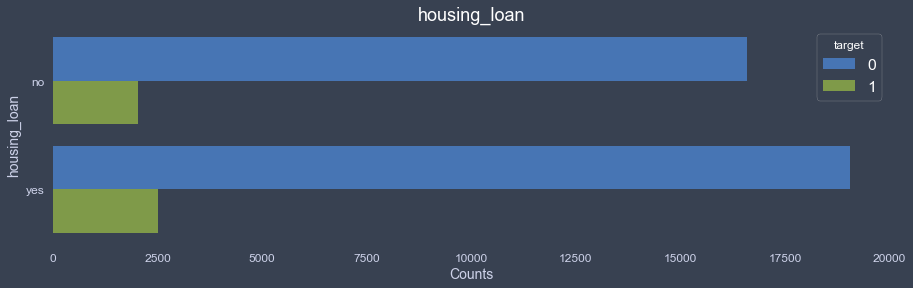

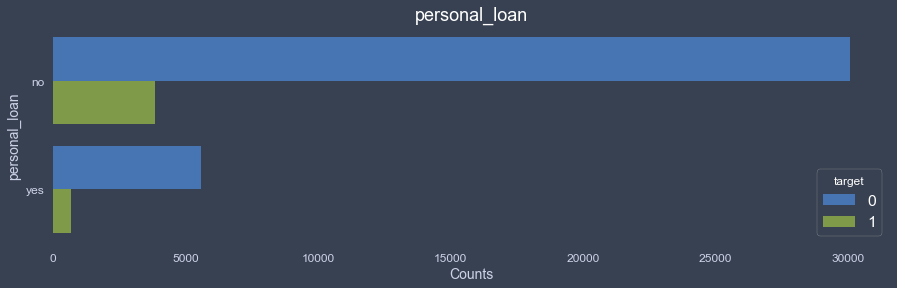

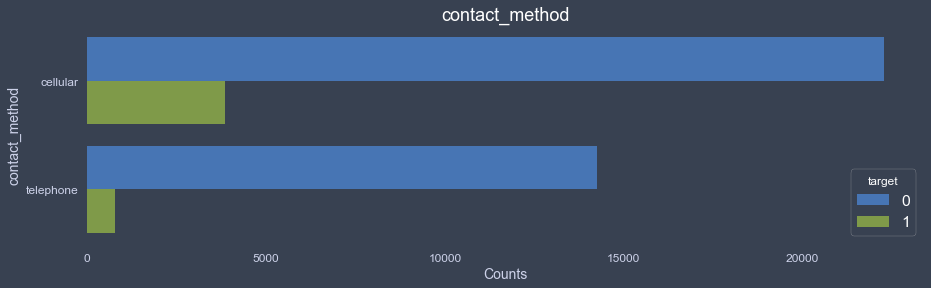

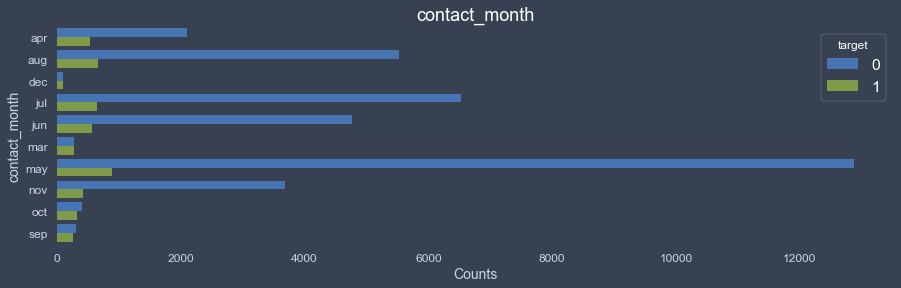

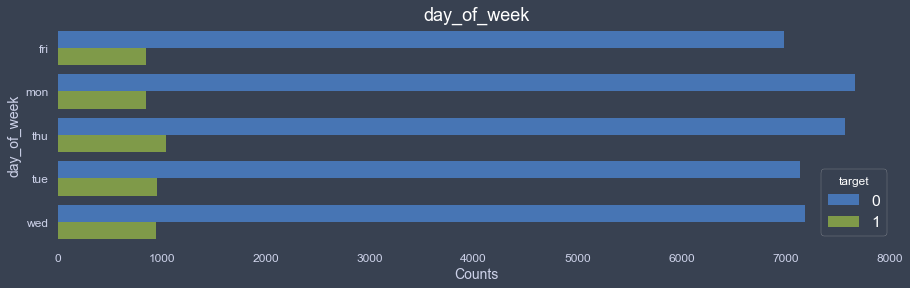

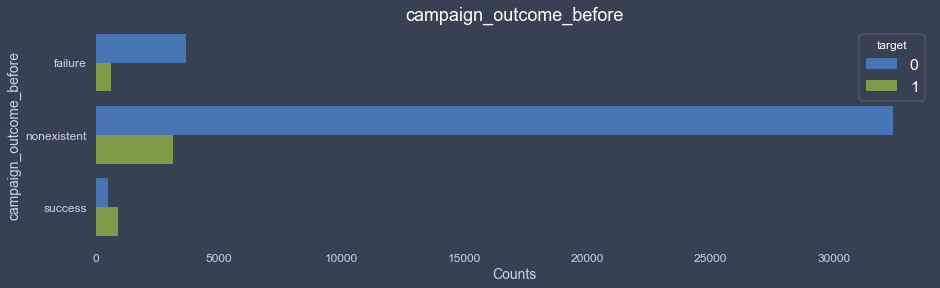

<Figure size 1080x288 with 0 Axes>

In [124]:
#quick review on numeric columns by bar charts (absolute values)
for col in list(data.select_dtypes(exclude='number').columns):
    plt.title(col)
    g=data.groupby([col,'target']).size().reset_index(name='Counts')
    sns.barplot(data=g, y=col, x='Counts', hue='target',orient='h')
    plt.figure(figsize=(15,4))
  

job: administrator is the largest group of positive result while retired and student have the largest positive result in proportion 

marital: there is no particular difference in martial status by percentage. 

education: illiterate group is the easist to buy a bank product however it is low in absolute volume. All other education groups are relatively similar in buying a bank product: about 10%. University degree group is more possible to buy a bank product.

contact_method: it is clear that contact by mobile phone has a higher chance to be successful in bank marketing. But why? Maybe, just guess, we don't want to be disturbed by others at home

contact_month: Mar, Dec, Sep, Oct are the four months to be more successful than other months. However, this will not be the case if the data period is limited in one year which we cannot confirm through the data. A short time period might not confirm the correlation. Besides, the time also correlated with external environment as emplpyment rate, etc.

campaign_outcome_before: this is so far the best indicator to tell the target. If the client was contacted before and the result was successful, it is more possible to sell a bank product.

## Drop Columns

In [125]:
data.drop(columns=['duration', 'pdays'], inplace=True)

## Correlation

Pearson Correlation Coefficient is usually used to identify if the feature is correlated with the target. It ranges from -1 to 1 and the higher the absolute value is the more correlation will be. The -1 means perfect negative correlation while the +1 means the perfect possitive correlation. If the absolute coefficient is close to 0, then the feature has limited relationship with the target.

Text(201.853125, 0.5, '')

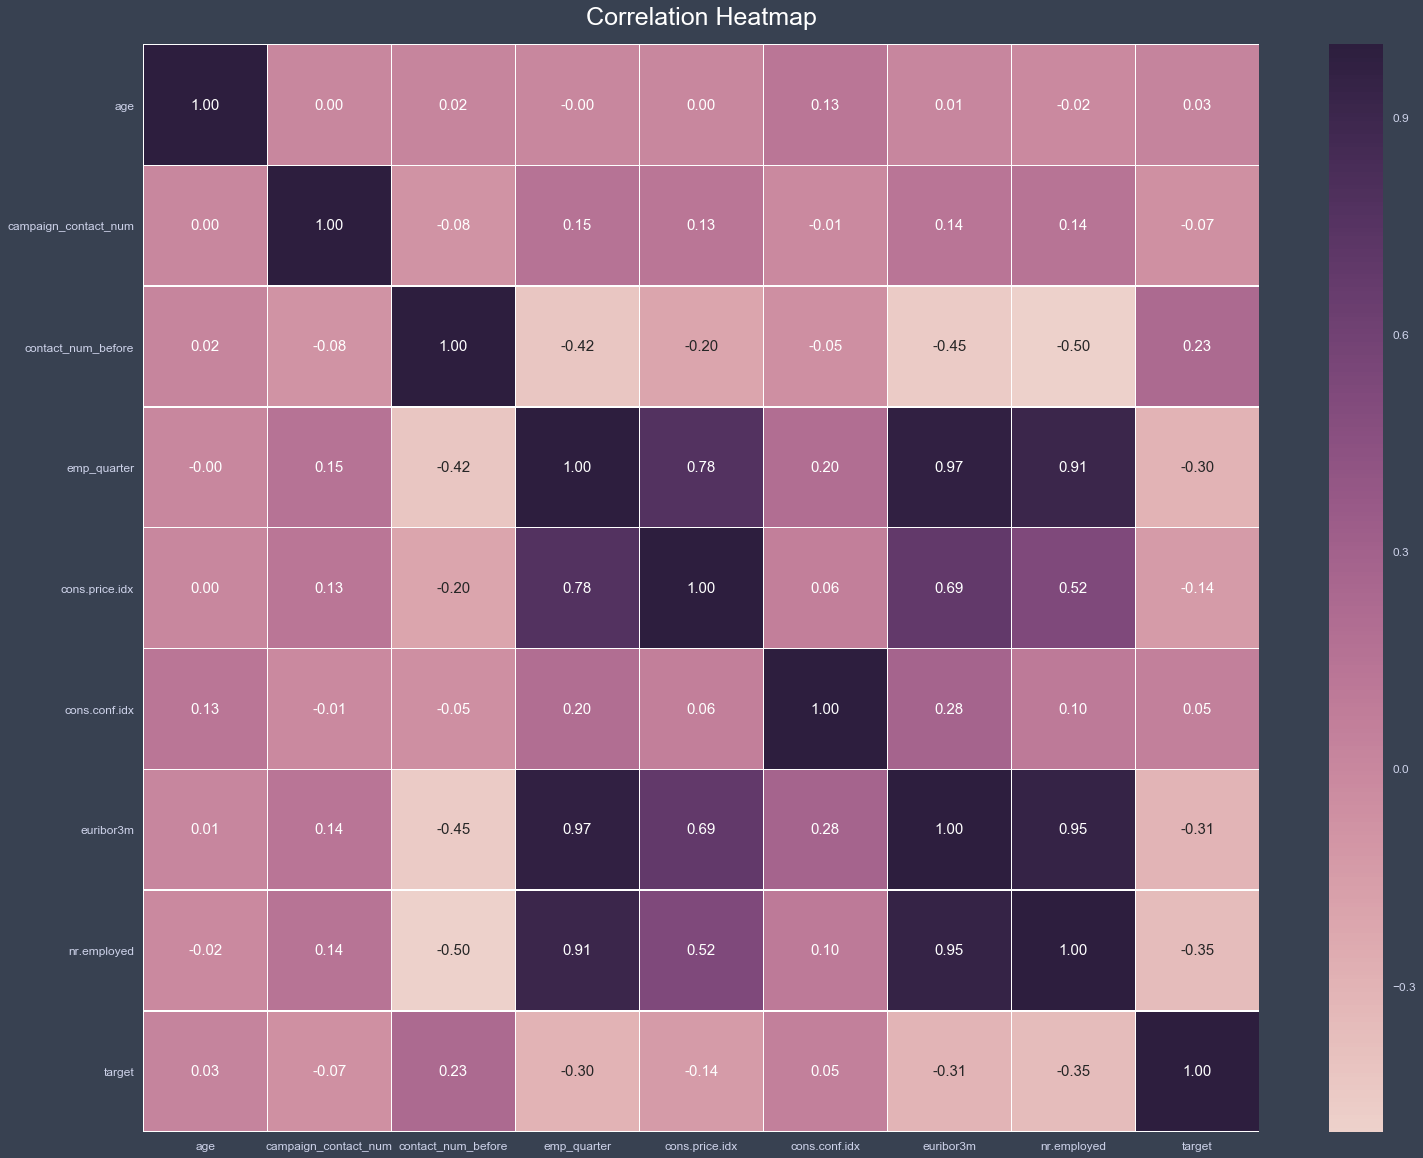

In [126]:
corrmat = data.corr()

f, ax = plt.subplots(figsize = (25,20))
cmap = sns.cubehelix_palette(as_cmap=True)
f=sns.heatmap(corrmat, annot=True, fmt='.2f', linewidths =.5, cmap=cmap,  annot_kws={'size': 15}, ax=ax)
ax.set_title("Correlation Heatmap",fontsize=25, pad=20)#pad is the v-distance
ax.set_xlabel("",fontsize=30)
ax.set_ylabel("",fontsize=30)

contact_num_before as what we have concluded has the highest correlation with the target while emp_quarter and euribor3m are negatively correlated

But what about the categorical columns? We can use oen-hot-encode to determine the relationsihp

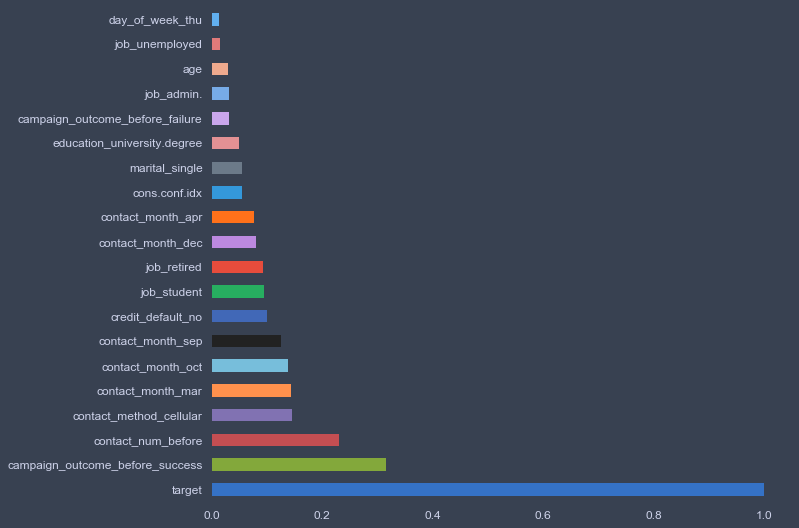

In [127]:
#for better visualization, bart chart can be used
one_hot = pd.get_dummies(data)
one_hot.corr()['target'].sort_values(ascending=False).head(20).plot(kind='barh')

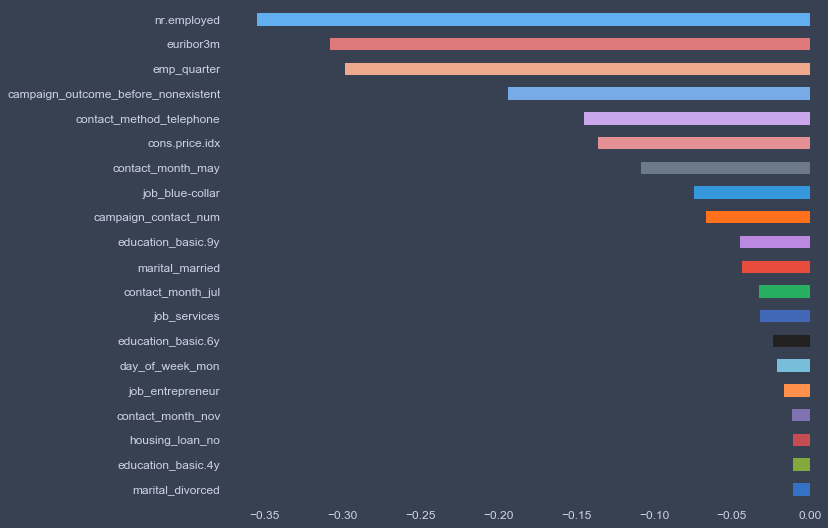

In [128]:
one_hot.corr()['target'].sort_values(ascending=False).tail(20).plot(kind='barh')

Positively Correlated: contact month has seen the strongest correlation with the campaign result
Negatively Correlated: employment is not surprisingly negatively correlated with the marketing result. 

However, the contact month is correlated with the overall economic environment as the employment, so it is questionable to consider it as an important factor.

## Binning the columns

In [129]:
#Transfer the age into age groups and transfer the education into ordinal sequence
label_names = ['infant','child','teenager','young_adult','adult','aged']
cut_points = [0,5,12,18,35,60,100]

#create range for each bin of age
data['age_bin'] = pd.cut(data.age, cut_points, labels=label_names)

In [131]:
#first, integrate the basic education
data['education_bin'] = data.education.replace(to_replace=['basic.4y', 'basic.6y', 'basic.9y'],
                                        value=['basic', 'basic', 'basic'])
#second, replace by ordinal number
data['education_bin']= data['education_bin'].replace(to_replace=['illiterate', 'basic', 'high.school', 
                                                       'professional.course', 'university.degree'],
                                        value=[1,2,3,4,5])

In [132]:
data.dtypes

age                           int64
job                          object
marital                      object
education                    object
credit_default               object
housing_loan                 object
personal_loan                object
contact_method               object
contact_month                object
day_of_week                  object
campaign_contact_num          int64
contact_num_before            int64
campaign_outcome_before      object
emp_quarter                 float64
cons.price.idx              float64
cons.conf.idx               float64
euribor3m                   float64
nr.employed                 float64
target                        int64
age_bin                    category
education_bin               float64
dtype: object

In [220]:
features = data.copy()
#select the categorical features
cat_feature = ['campaign_outcome_before', 'contact_method', 'job', 'contact_month', 'age_bin']
cat_feature = pd.get_dummies(data[cat_feature])
#select the numerical features
num_feature = data.select_dtypes('number')
features = pd.concat([num_feature, cat_feature], axis = 1)
features.drop(columns=['age'], inplace=True)

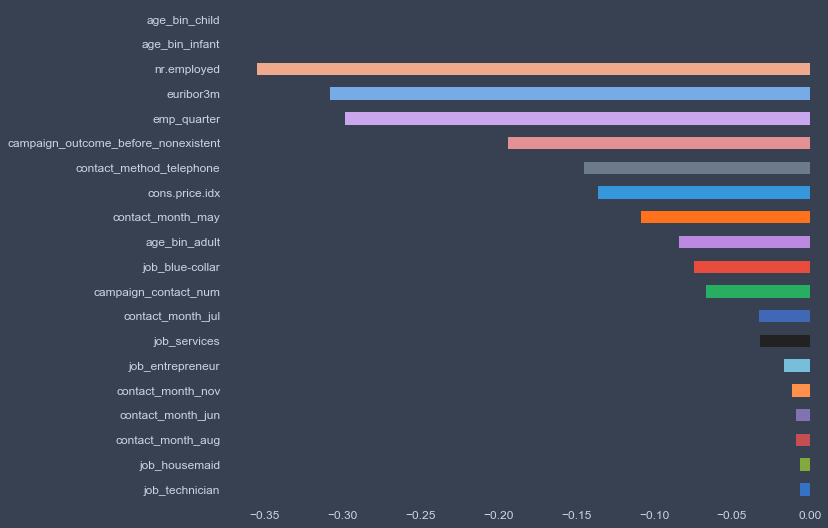

In [221]:
features.corr()['target'].sort_values(ascending=False).tail(20).plot(kind='barh')

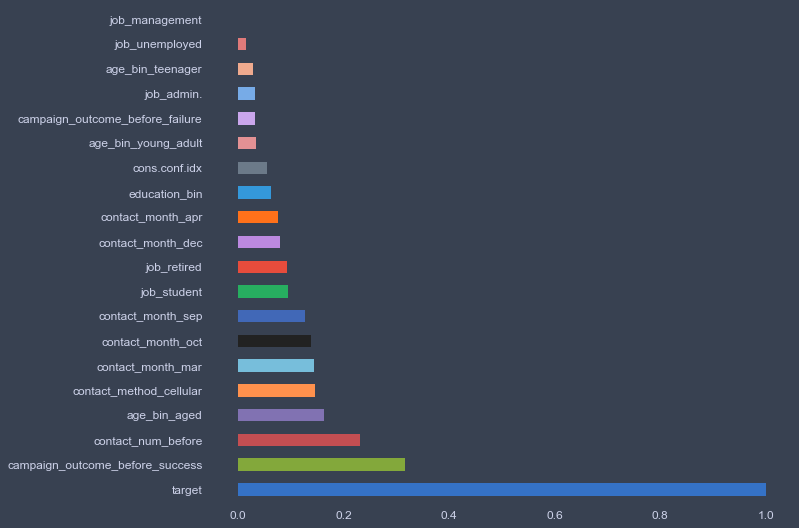

In [222]:
features.corr()['target'].sort_values(ascending=False).head(20).plot(kind='barh')

By binning the age group, aged people inclined  to buy the financial product

# Feature Engineering

In short, feature engineering will transform the raw data into new columns for better machine learning result. There is no standard in this process but this is the most important step to optimize the prediction result. Try and error is common and necessary to get things better.

## Remove Collinear Features

In [223]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['target']
    x = x.drop(columns = ['target'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Add the score back in to the data
    x['target'] = y
               
    return x

In [224]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6)

In [225]:
features.shape

(41176, 37)

In [226]:
features.columns

Index(['campaign_contact_num', 'contact_num_before', 'emp_quarter', 'cons.price.idx',
       'cons.conf.idx', 'education_bin', 'campaign_outcome_before_success',
       'contact_method_cellular', 'contact_method_telephone', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed', 'contact_month_apr',
       'contact_month_aug', 'contact_month_dec', 'contact_month_jul', 'contact_month_jun',
       'contact_month_mar', 'contact_month_may', 'contact_month_nov', 'contact_month_oct',
       'contact_month_sep', 'age_bin_infant', 'age_bin_child', 'age_bin_teenager',
       'age_bin_young_adult', 'age_bin_adult', 'age_bin_aged', 'target'],
      dtype='object')

# Baseline Metrics

In [227]:
#the baseline accuracy should at least higher than the percentage of the positive target
baseline = 1-(data.dropna().target.value_counts()[1]/data.dropna().target.value_counts()[0])
'Baseline Accuracy is {:.2%}'.format(baseline)

'Baseline Accuracy is 85.51%'

# Model Comparision

## Transform data with imputed missing values and MinMaxScaler

In [228]:
#First, impute categorical columns with most frequent values
for col in list(features.columns):
    if ('campaign_outcome' in col or 'job' in col or 'contact_month' in col):
        features[col].fillna(features[col].value_counts().index[0], inplace=True)

#Second, impute numerical columns with median 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

#Third, use scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))




In [229]:
#fit and transform data
X = features.drop(columns=['target'])
y = features['target']

X = imp.fit_transform(X)
X = scaler.fit_transform(X)

## Model Training

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7, test_size=0.33)

seed=7

'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)

'''Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), 
                                                    train_accuracy(svc), 
                                                    train_accuracy(rf), 
                                                    train_accuracy(knn), 
                                                    train_accuracy(xgbc)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'XGBC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)
train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

,Train_accuracy(%)
RF,93.83
KNN,90.92
XGBC,90.17
LR,89.95
SVC,89.82


## K-Fold

In [234]:
'''Create a function that returns mean cross validation score for different models.'''

def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(
        model, X, y, cv=5, scoring='accuracy').mean()
    x_val_score = np.round(x_val_score * 100, 2)
    return x_val_score


x_val_score = pd.DataFrame({
    'X_val_score(%)': [
        x_val_score(lr),
        x_val_score(svc),
        x_val_score(rf),
        x_val_score(knn),
        x_val_score(xgbc)
    ]
})
x_val_score.index = [
    'LR', 'SVC', 'RF', 'KNN', 'XGBC'
]
sorted_x_val_score = x_val_score.sort_values(
    by='X_val_score(%)', ascending=False)
sorted_x_val_score

,X_val_score(%)
LR,78.73
SVC,61.38
XGBC,58.48
RF,55.20
KNN,53.39


# Model Optimization

## Hypertuning

In [238]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 0, cv = 5, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X, y)
    print(model.name)
     # our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print( "Best Parameters: {}".format(grid.best_params_))

In [237]:
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

print(get_best_model_and_accuracy(lr, lr_params, X, y))


svc_params = {'C': [6, 8, 10, 12], 
              'gamma': [0.1, 0.001]}

print(get_best_model_and_accuracy(svc, svc_params, X, y))

xgbc_params = {'n_estimators': (50, 100, 150, 200),
              'learning_rate': (0.01, 0.1, 0.2),
              'subsample': (0.3, 0.9),
              'max_depth': [4, 6, 8],
              'colsample_bytree': (0.5, 0.9),
              'min_child_weight': [1],
              'random_state':[seed]}
print(get_best_model_and_accuracy(xgbc, xgbc_params, X, y))

knn_params = {'n_neighbors':[4, 5, 6, 7, 8, 9, 10, 11, 12]}
print(get_best_model_and_accuracy(knn, knn_params, X, y))


rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}
print(get_best_model_and_accuracy(rf, rf_params, X, y))


Best Accuracy: 0.7873275694579367
Best Parameters: {'C': 1.0, 'penalty': 'l2'}
None
Best Accuracy: 0.8051049154847484
Best Parameters: {'C': 8, 'gamma': 0.001}
None
Best Accuracy: 0.6077326598018263
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150, 'random_state': 7, 'subsample': 0.3}
None
Best Accuracy: 0.5810909267534486
Best Parameters: {'n_neighbors': 12}
None


SVC is the best model with a 80.5% accuracy.

## Confusion Report

In [239]:
def classification_report(model, X, y):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X, y, cv = 5)
    from sklearn.metrics import classification_report
    classification_report = classification_report(y, predicted)
    return print(classification_report)

In [268]:
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X_train, y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(y_train, predicted, rownames = ['Actual'], colnames = ['Predicted/Classified'], margins = True) # We use pandas crosstab
    return display(confusion_matrix)

In [240]:
#define the best model with the best param
svc = SVC(gamma = 0.001, C = 8, random_state = seed)
#generate the classification report
print( '\nClasification report:\n'), classification_report(svc, X, y)
#generate the confusion matrix
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(svc, X, y, cv = 5)
print ('\nConfussion matrix:\n'), confusion_matrix(y, predicted)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     36537
           1       0.17      0.18      0.18      4639

   micro avg       0.81      0.81      0.81     41176
   macro avg       0.53      0.53      0.53     41176
weighted avg       0.81      0.81      0.81     41176



Confusion Report: the result for predicting negative campaign result is quite good. However, the presicion rate for positive result is very low, under 20%. This is due to the unbalanced target value: the model learn well about how to tell the negative result is, but not positive result.

# Feature Importance

In [245]:
# Extract the feature importances into a dataframe
def feature_importance(model):
    importance = pd.DataFrame({'Feature': features.columns,
                              'Importance': np.round(model.feature_importances_,3)})
    importance = importance.sort_values(by = 'Importance').set_index('Feature')
    return importance

In [251]:
#tree-based feature importance
xgbc = XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.01, max_depth= 4, 
                     min_child_weight= 1, n_estimators= 150, 
                     random_state= 7, subsample= 0.3)
xgbc.fit(X, y)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(features.drop(columns=['target']).columns), 
                                'importance': xgbc.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,cons.conf.idx,0.17
1,cons.price.idx,0.14
2,emp_quarter,0.10
3,campaign_contact_num,0.06
4,contact_num_before,0.05
5,education_bin,0.05
6,contact_method_cellular,0.05
7,campaign_outcome_before_success,0.04
8,contact_month_oct,0.04
9,age_bin_aged,0.03


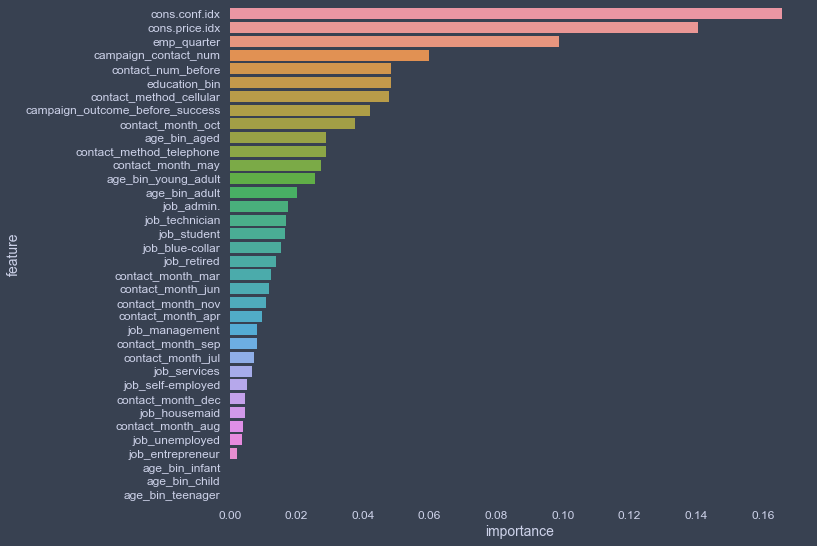

In [254]:
sns.barplot(data=feature_results, y='feature', x='importance', orient='h')

## Use New Feature for Modeling

Just try out new features to check if the result is improved

In [260]:
feature_list = list(feature_results.head(10)['feature'])
features_new = features[feature_list]

In [261]:
#fit and transform data
X = features_new
y = features['target']

X = imp.fit_transform(X)
X = scaler.fit_transform(X)

In [264]:
#define the best model with the best param
svc = SVC(gamma = 0.001, C = 8, random_state = seed)
from sklearn.model_selection import cross_val_score
cross_val_score(
        svc, X, y, cv=5, scoring='accuracy').mean()

0.8668600200571255

In [269]:
#define the best model with the best param
svc = SVC(gamma = 0.001, C = 8, random_state = seed)
#generate the classification report
print( '\nClasification report:\n'), classification_report(svc, X, y)

#generate the confusion matrix
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(svc, X, y, cv = 5)
print ('\nConfussion matrix:\n'), confusion_matrix(svc)


Clasification report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     36537
           1       0.34      0.19      0.25      4639

   micro avg       0.87      0.87      0.87     41176
   macro avg       0.62      0.57      0.59     41176
weighted avg       0.84      0.87      0.85     41176


Confussion matrix:



Predicted/Classified,0,1,All
Actual,,,
0,24185,322,24507
1,2487,593,3080
All,26672,915,27587


(None, None)